### Exercício

Utilize agora a implementação do scikit-learn da rede  perceptron para o dataset do exemplo utilizando from StandardScaler no pré-processamento e avaliação usando holdout 70/30.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [80]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

In [83]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [122]:
X = df.drop(columns=4).values
y = df[4].values

In [123]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [124]:
y = np.unique(y, return_inverse=True)[1]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [126]:
sdsc = StandardScaler()

sdsc.fit(X_train)

X_train_std = sdsc.transform(X_train)
X_test_std = sdsc.transform(X_test)

In [137]:
X_test_std = X_test_std[:, [2,3]]
X_train_std = X_train_std[:, [2,3]]

In [152]:
ppn = Perceptron(eta0=0.1, n_iter_no_change=100, random_state=22)

ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, n_iter_no_change=100, random_state=22)

In [153]:
y_pred = ppn.predict(X_test_std)

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
acc = accuracy_score(y_test, y_pred)

In [156]:
print("A acuraca é de {0:.2f}%".format(acc * 100))

A acuraca é de 80.00%


In [157]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [158]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [159]:
import matplotlib.pyplot as plt

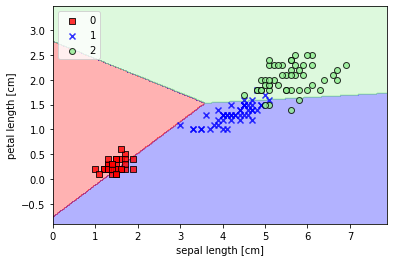

In [160]:
plot_decision_regions(X_combined, y_combined, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


plt.show()